# RATINGS PREDICTION

# Problem Statement

We have a client who has a website where people write different reviews for technical products. 
Now they are adding a new feature to their website i.e. The reviewer will have to add stars(rating) 
as well with the review. The rating is out 5 stars and it only has 5 options available 1 star, 2 stars, 
3 stars, 4 stars, 5 stars. Now they want to predict ratings for the reviews which were written in the 
past and they don’t have a rating. So, we have to build an application which can predict the rating 
by seeing the review

## Data Collection Phase

You have to scrape at least 20000 rows of data. You can scrape more data as well, it’s up to you. 
more the data better the model
In this section you need to scrape the reviews of different laptops, Phones, Headphones, smart 
watches, Professional Cameras, Printers, Monitors, Home theater, Router from different ecommerce websites.
Basically, we need these columns1) reviews of the product.
2) rating of the product.
You can fetch other data as well, if you think data can be useful or can help in the project. It 
completely depends on your imagination or assumption.
Hint:
• Try to fetch data from different websites. If data is from different websites, it will help our 
model to remove the effect of over fitting.
• Try to fetch an equal number of reviews for each rating, for example if you are fetching
10000 reviews then all ratings 1,2,3,4,5 should be 2000. It will balance our data set.
• Convert all the ratings to their round number, as there are only 5 options for rating i.e., 
1,2,3,4,5. If a rating is 4.5 convert it 5.

## Model Building Phase

After collecting the data, you need to build a machine learning model. Before model building do 
all data preprocessing steps involving NLP. Try different models with different hyper parameters 
and select the best model.
Follow the complete life cycle of data science. Include all the steps like1. Data Cleaning
2. Exploratory Data Analysis
3. Data Preprocessing
4. Model Building
5. Model Evaluation
6. Selecting the best model

## Import libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows', 200000)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

In [3]:
pd.set_option('display.max_rows',None)

In [4]:
df=pd.read_excel('C:\\Users\\Jayasurya E\\Data_Science_Project\\Rating_prediction\\rating_prediction.xlsx')
df.head()

,Product,Rating,Review
0,laptop,4,"All over good, but body made with plastic and ..."
1,laptop,5,fast delivry
2,laptop,5,"Couldn't get the i3 11th gen, 8gb and 256GB, f..."
3,laptop,2,"There is no ehternet cable connection port, Ne..."
4,laptop,4,Good product 👍


In [5]:
df.columns    # checking the variables in column section.

Index(['Product', 'Rating', 'Review'], dtype='object')

### Dataframe Description:

In the above dataset the target is to predict the ratings of product.

In [6]:
df.info()  #Checking the information of train data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Product  20050 non-null  object
 1   Rating   20050 non-null  int64 
 2   Review   20050 non-null  object
dtypes: int64(1), object(2)
memory usage: 470.0+ KB


In [7]:
print ('shape = >',df.shape)                 # Checking the data dimension

shape = > (20050, 3)


We have 20050 rows and 3 columns including the target column.

In [8]:
print ('Rating counts','\n',df.Rating.value_counts())     # Checking the rating counts

Rating counts 
 5    11671
4     4095
1     2202
3     1439
2      643
Name: Rating, dtype: int64


In [9]:
# New column for length of message 
df['Length'] = df.Review.str.len()
df.head(5)

,Product,Rating,Review,Length
0,laptop,4,"All over good, but body made with plastic and ...",145
1,laptop,5,fast delivry,12
2,laptop,5,"Couldn't get the i3 11th gen, 8gb and 256GB, f...",268
3,laptop,2,"There is no ehternet cable connection port, Ne...",128
4,laptop,4,Good product 👍,14


In [10]:
# Convert all message to lower case
df['Review'] = df["Review"].str.lower()
df.head()

,Product,Rating,Review,Length
0,laptop,4,"all over good, but body made with plastic and ...",145
1,laptop,5,fast delivry,12
2,laptop,5,"couldn't get the i3 11th gen, 8gb and 256gb, f...",268
3,laptop,2,"there is no ehternet cable connection port, ne...",128
4,laptop,4,good product 👍,14


### Regular Expression

In [11]:
# remove punctuation
df['Review'] = df['Review'].str.replace(r'[^\w\d\s]', ' ')

In [12]:
# replace whitespace between terms with a single space
df['Review'] = df['Review'].str.replace(r'\s+', ' ')

In [13]:
# Remove leading and trailing white space
df['Review'] = df['Review'].str.replace(r'^\s+|\s+?$', '')

In [14]:
# Replace numbers with 'numbr'   
df['Review'] = df['Review'].str.replace(r'\d+(\.\d+)?',
                                       'numbr')

In [15]:
# Replace Urls with 'webaddress'
df['Review'] = df['Review'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\$^)?$',
                                       'webaddress')

In [16]:
df.head()

,Product,Rating,Review,Length
0,laptop,4,all over good but body made with plastic and d...,145
1,laptop,5,fast delivry,12
2,laptop,5,couldn t get the inumbr numbrth gen numbrgb an...,268
3,laptop,2,there is no ehternet cable connection port nee...,128
4,laptop,4,good product,14


In [17]:
# Remove stopwords
import string 
import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english') + ['u', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure', 'frnumbrtu', 'inumbr','numbrth','numbr'])
df['Review'] = df['Review'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

In [18]:
# New column (clean_length) after punctuation, stopwords removal
df['clean_length'] = df.Review.str.len()
df.head()

,Product,Rating,Review,Length,clean_length
0,laptop,4,good body made plastic feel premiumness displa...,145,96
1,laptop,5,fast delivry,12,12
2,laptop,5,get gen numbrgb numbrgb full hd screen price p...,268,172
3,laptop,2,ehternet cable connection port need purchase a...,128,100
4,laptop,4,good product,14,12


In [19]:
# Total length removal
print('Original Length', df.Length.sum())
print('Clean length', df.clean_length.sum())

Original Length 1445748
Clean length 999563


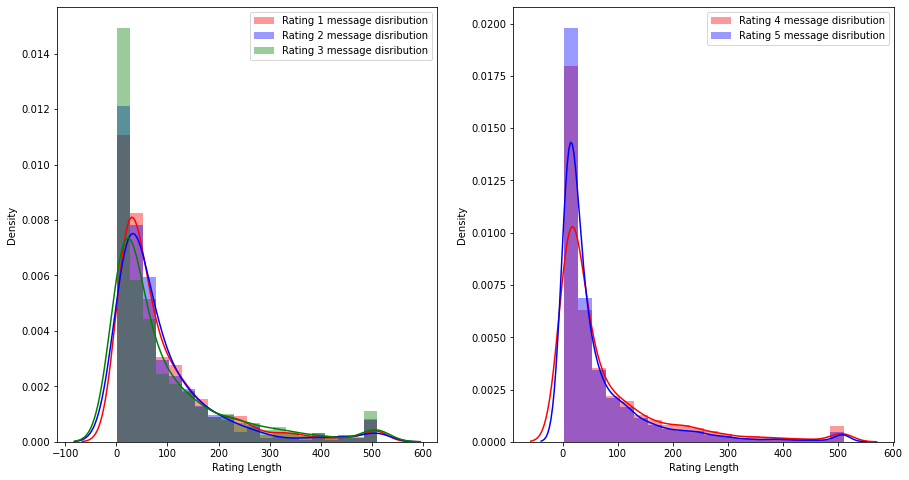

In [20]:
# Message distribution before cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(df[df['Rating']==1]['Length'],bins=20,ax=ax[0],label='Rating 1 message disribution',color='r')

ax[0].set_xlabel('Rating Length')
ax[0].legend()

sns.distplot(df[df['Rating']==2]['Length'],bins=20,ax=ax[0],label='Rating 2 message disribution',color='b')

ax[0].set_xlabel('Rating Length')
ax[0].legend()

sns.distplot(df[df['Rating']==3]['Length'],bins=20,ax=ax[0],label='Rating 3 message disribution',color='g')

ax[0].set_xlabel('Rating Length')
ax[0].legend()

sns.distplot(df[df['Rating']==4]['Length'],bins=20,ax=ax[1],label='Rating 4 message disribution',color='r')

ax[1].set_xlabel('Rating Length')
ax[1].legend()

sns.distplot(df[df['Rating']==5]['Length'],bins=20,ax=ax[1],label='Rating 5 message disribution',color='b')

ax[1].set_xlabel('Rating Length')
ax[1].legend()

plt.show()

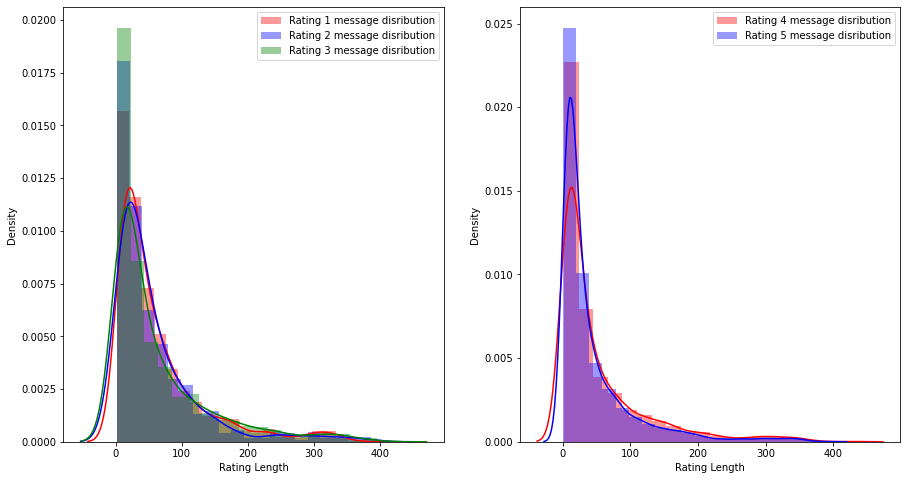

In [21]:
# Message distribution after cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(df[df['Rating']==1]['clean_length'],bins=20,ax=ax[0],label='Rating 1 message disribution',color='r')

ax[0].set_xlabel('Rating Length')
ax[0].legend()

sns.distplot(df[df['Rating']==2]['clean_length'],bins=20,ax=ax[0],label='Rating 2 message disribution',color='b')

ax[0].set_xlabel('Rating Length')
ax[0].legend()

sns.distplot(df[df['Rating']==3]['clean_length'],bins=20,ax=ax[0],label='Rating 3 message disribution',color='g')

ax[0].set_xlabel('Rating Length')
ax[0].legend()

sns.distplot(df[df['Rating']==4]['clean_length'],bins=20,ax=ax[1],label='Rating 4 message disribution',color='r')

ax[1].set_xlabel('Rating Length')
ax[1].legend()

sns.distplot(df[df['Rating']==5]['clean_length'],bins=20,ax=ax[1],label='Rating 5 message disribution',color='b')

ax[1].set_xlabel('Rating Length')
ax[1].legend()

plt.show()

In [22]:
!pip install wordcloud

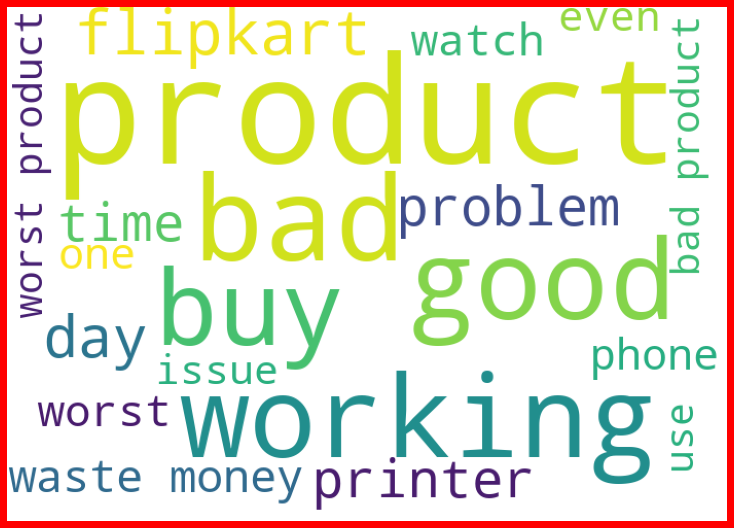

In [23]:
#getting sense of loud words in rating 1
from wordcloud import WordCloud

rating_1 = df["Review"][df["Rating"]==1]

rating1_cloud = WordCloud(width=700, height=500, background_color='white',max_words=20).generate(' '.join(rating_1))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(rating1_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

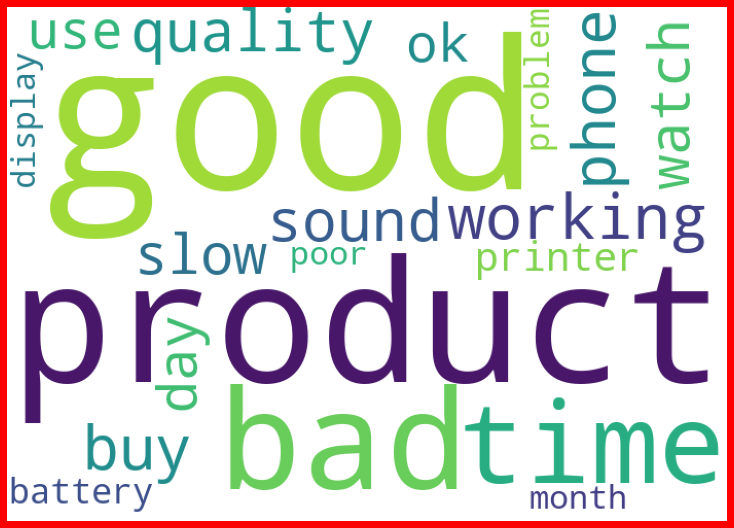

In [24]:
#getting sense of loud words in rating 2
from wordcloud import WordCloud

rating_2 = df["Review"][df["Rating"]==2]

rating2_cloud = WordCloud(width=700, height=500, background_color='white',max_words=20).generate(' '.join(rating_2))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(rating2_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

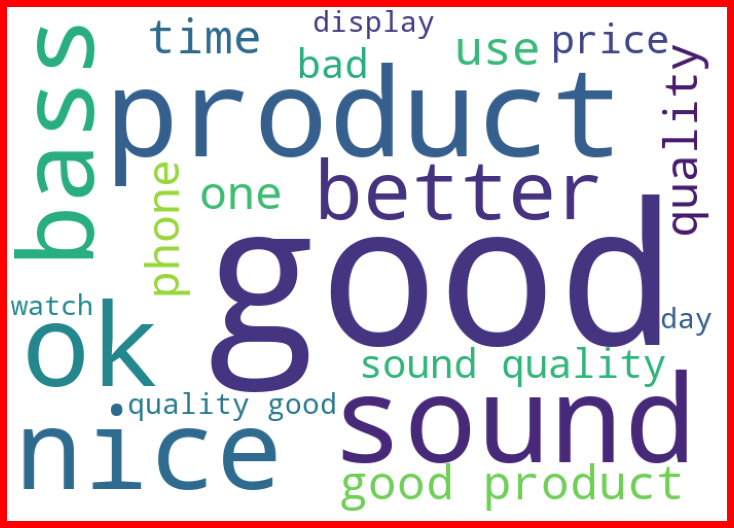

In [25]:
#getting sense of loud words in rating 3
from wordcloud import WordCloud

rating_3 = df["Review"][df["Rating"]==3]

rating3_cloud = WordCloud(width=700, height=500, background_color='white',max_words=20).generate(' '.join(rating_3))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(rating3_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

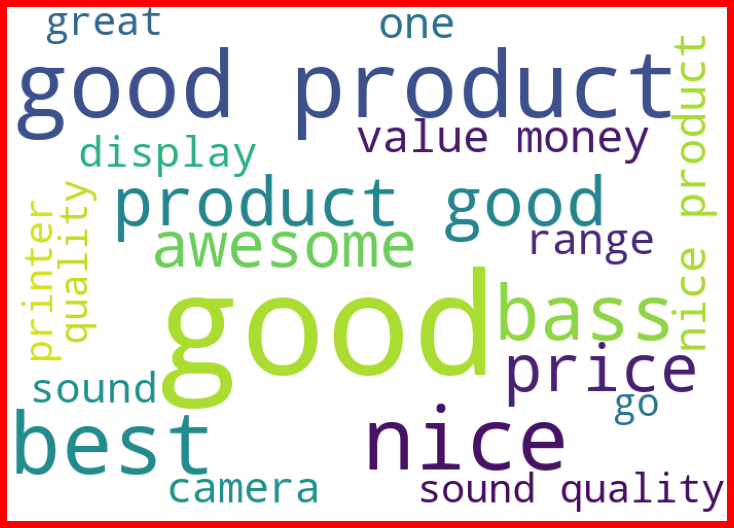

In [26]:
#getting sense of loud words in rating 4
from wordcloud import WordCloud

rating_4 = df["Review"][df["Rating"]==4]

rating4_cloud = WordCloud(width=700, height=500, background_color='white',max_words=20).generate(' '.join(rating_4))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(rating4_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

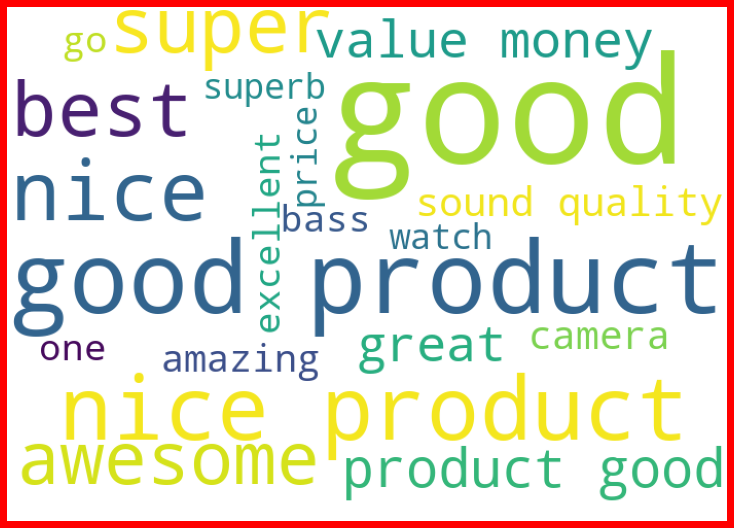

In [27]:
#getting sense of loud words in rating 5
from wordcloud import WordCloud

rating_5 = df["Review"][df["Rating"]==5]

rating5_cloud = WordCloud(width=700, height=500, background_color='white',max_words=20).generate(' '.join(rating_5))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(rating5_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Importing Libraries for Metrics and Model buiding.

In [28]:
# 1. Convert text into vectors using TF-IDF
# 2.Instantiate MultinominalNB classifier, SGDClassifier, KNeighborsClassifier, LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics

In [29]:
# Split feature and Rating
tf_vec = TfidfVectorizer()
features = tf_vec.fit_transform(df["Review"])

x= features
y =df["Rating"]

## Classification Method

In [30]:
maxAccu=0
BestRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.30,random_state=i)
    naive = MultinomialNB()
    naive.fit(x_train, y_train)
    predict_test = naive.predict(x_test)
    acc=accuracy_score(y_test, predict_test)
    if acc>maxAccu:
        maxAccu=acc
        BestRS=i
print("Best acuracy is " ,maxAccu," on Random_state ",BestRS)

Best acuracy is  0.6408977556109726  on Random_state  135


In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.30,random_state = BestRS)

In [32]:
def eval(x):
    mod =x
    mod.fit(x_train, y_train)
    predict_test = mod.predict(x_test)
    print("Accuracy score is ", accuracy_score(y_test, predict_test)*100)
    print("Confusion matrix is", confusion_matrix(y_test,predict_test))
    print("Classification report", metrics.classification_report(y_test, predict_test, digits=2))  

In [33]:
eval(MultinomialNB())

Accuracy score is  64.08977556109726
Confusion matrix is [[ 247    0    0   11  363]
 [  35    0    1    7  159]
 [  27    0    0   16  385]
 [  10    0    0   26 1127]
 [   5    0    0   14 3582]]
Classification report               precision    recall  f1-score   support

           1       0.76      0.40      0.52       621
           2       0.00      0.00      0.00       202
           3       0.00      0.00      0.00       428
           4       0.35      0.02      0.04      1163
           5       0.64      0.99      0.78      3601

    accuracy                           0.64      6015
   macro avg       0.35      0.28      0.27      6015
weighted avg       0.53      0.64      0.53      6015



In [34]:
eval(SGDClassifier())

Accuracy score is  67.98004987531172
Confusion matrix is [[ 482    4    8    9  118]
 [  94    7    6    8   87]
 [  74    5   34   28  287]
 [  59    6   20   68 1010]
 [  34    2   17   50 3498]]
Classification report               precision    recall  f1-score   support

           1       0.65      0.78      0.71       621
           2       0.29      0.03      0.06       202
           3       0.40      0.08      0.13       428
           4       0.42      0.06      0.10      1163
           5       0.70      0.97      0.81      3601

    accuracy                           0.68      6015
   macro avg       0.49      0.38      0.36      6015
weighted avg       0.60      0.68      0.59      6015



In [35]:
eval(KNeighborsClassifier())

Accuracy score is  60.19950124688279
Confusion matrix is [[ 356   17   26   28  194]
 [  64    4   13   23   98]
 [  62    4   29   61  272]
 [  52    7   47  170  887]
 [  70    6   52  411 3062]]
Classification report               precision    recall  f1-score   support

           1       0.59      0.57      0.58       621
           2       0.11      0.02      0.03       202
           3       0.17      0.07      0.10       428
           4       0.25      0.15      0.18      1163
           5       0.68      0.85      0.75      3601

    accuracy                           0.60      6015
   macro avg       0.36      0.33      0.33      6015
weighted avg       0.53      0.60      0.56      6015



In [36]:
eval(LinearSVC())

Accuracy score is  66.35078969243557
Confusion matrix is [[ 444   15   22   34  106]
 [  77   17   24   14   70]
 [  63    9   63   66  227]
 [  48    6   45  164  900]
 [  40    6   43  209 3303]]
Classification report               precision    recall  f1-score   support

           1       0.66      0.71      0.69       621
           2       0.32      0.08      0.13       202
           3       0.32      0.15      0.20       428
           4       0.34      0.14      0.20      1163
           5       0.72      0.92      0.80      3601

    accuracy                           0.66      6015
   macro avg       0.47      0.40      0.41      6015
weighted avg       0.60      0.66      0.61      6015



So, In our modelling approach, the best model is SGD Classifier and the worst model is KNeighbors Classifier. We can see that the difference in Accuracy score between the best model and the worst model is significant; the best model has almost 12 % of the Accuracy score of the worst model.but it can be due to overhitting also so we well check cross validation scores.

## Cross Validation:

In [37]:
from sklearn.model_selection import cross_val_score

In [38]:
scr=cross_val_score(MultinomialNB(), x, y, cv=5)
print("cross validation score of MultinomialNB model:",scr.mean())

cross validation score of MultinomialNB model: 0.6273316708229426


In [39]:
scr=cross_val_score(SGDClassifier(), x, y, cv=5)
print("cross validation score of SGDClassifier model:",scr.mean())

cross validation score of SGDClassifier model: 0.6485785536159601


In [40]:
scr=cross_val_score(KNeighborsClassifier(), x, y, cv=5)
print("cross validation score of KNeighborsClassifier model:",scr.mean())

cross validation score of KNeighborsClassifier model: 0.5671820448877807


In [41]:
scr=cross_val_score(LinearSVC(), x, y, cv=5)
print("cross validation score of LinearSVC model:",scr.mean())

cross validation score of LinearSVC model: 0.6183042394014964


Min difference in Accuracy score and cross validation score is for MultinomialNB model,so this is our best model.

Here we have handled the problem of the overfitting and the underfitting by checking the Accuracy score.

### Plot confusion matrix heatmap

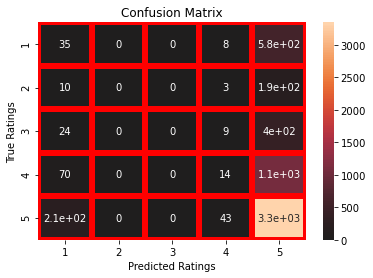

In [42]:
conf_mat = confusion_matrix(y_test,predict_test)

ax = plt.subplot()

sns.heatmap(conf_mat, annot=True,ax=ax,linewidth=5,linecolor='r',center=0)

ax.set_xlabel('Predicted Ratings');ax.set_ylabel('True Ratings')

ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['1','2','3','4','5'])
ax.yaxis.set_ticklabels(['1','2','3','4','5'])
plt.show()

In [43]:
conf_mat

array([[  35,    0,    0,    8,  578],
       [  10,    0,    0,    3,  189],
       [  24,    0,    0,    9,  395],
       [  70,    0,    0,   14, 1079],
       [ 212,    0,    0,   43, 3346]], dtype=int64)

## Hyper Parameter Tuning

### Import GridSearchCV

In [44]:
from sklearn.model_selection import GridSearchCV

## Hyper Parameter Tunging for MultinomialNB

In [45]:
from sklearn.naive_bayes import MultinomialNB
parameters={'alpha' : [ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0] ,'fit_prior' : ['True', 'False'],
            'class_prior' : [None, [.1,.9],[.2, .8]]}
mnb=MultinomialNB()
clf=GridSearchCV(mnb,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.2, 'class_prior': None, 'fit_prior': 'True'}


In [46]:
mnb=MultinomialNB(alpha = 0.2, fit_prior = 'True', class_prior = None)
mnb.fit(x_train,y_train)
mnb.score(x_train,y_train)
pred_decision=mnb.predict(x_test)
mnbs=accuracy_score(y_test,pred_decision)
print('Accuracy Score:',mnbs*100)
mnbscore=cross_val_score(mnb,x,y,cv=5)
mnbc=mnbscore.mean()
print('Cross Val Score:',mnbc*100)

Accuracy Score: 66.46716541978387
Cross Val Score: 62.71820448877806


##### We are getting model accuracy and cross validation has 66.46% & 62.7% respectively.which shows our model is performing well.

## Analysis and Comparision

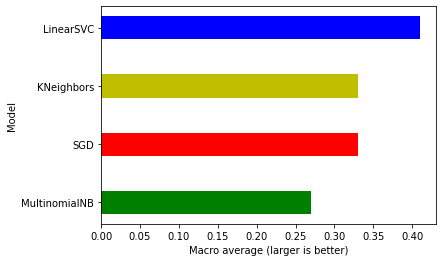

In [47]:
x = ['MultinomialNB','SGD', 'KNeighbors', 'LinearSVC']
y = [0.27, 0.33, 0.33, 0.41]
colors = ["g", "r", "y", "b", "brown"]
fig, js = plt.subplots()
plt.barh(y=range(len(x)), tick_label=x, width=y, height=0.4, color=colors);
js.set(xlabel="Macro average (larger is better)", ylabel="Model");

By looking at the table and the graph, we can see that LinearSVC has the larger macro average of 0.41. After that, SGD and  KNeighbor comes with an similar macro average score : 0.33 and 0.33 respectively. At last, the MultinomialNB comes with an 0.27.

So, in our experiment, the best model is LinearSVC and the worst model is MultinomialNB. We can see that the difference in macro average between the best model and the worst model is significant; the best model has least of the worst model.

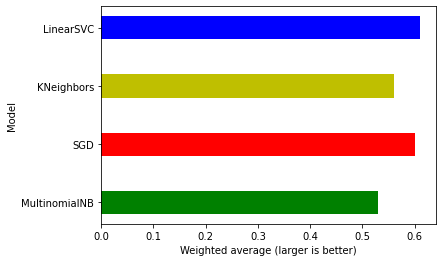

In [48]:
x = ['MultinomialNB','SGD', 'KNeighbors', 'LinearSVC']
y = [0.53, 0.60, 0.56, 0.61]
colors = ["g", "r", "y", "b", "brown"]
fig, js = plt.subplots()
plt.barh(y=range(len(x)), tick_label=x, width=y, height=0.4, color=colors);
js.set(xlabel="Weighted average (larger is better)", ylabel="Model");

By looking at the table and the graph, we can see that LinearSVC has larger weighted average of 0.61 followed by SGD of 0.6. At last, the KNeighbors and MultinomialNB comes with an similar weighted average: 0.56  and 0.53 respectively.

So, in our experiment, the best model is LinearSVC and the worst model is MultinomialNB. We can see that the difference in  weighted average between the best model and the worst model is significant; the best model has almost least of the worst model.

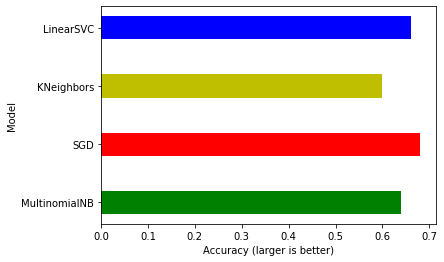

In [49]:
x = ['MultinomialNB','SGD', 'KNeighbors', 'LinearSVC']
y = [0.64, 0.68, 0.60, 0.66]
colors = ["g", "r", "y", "b", "brown"]
fig, js = plt.subplots()
plt.barh(y=range(len(x)), tick_label=x, width=y, height=0.4, color=colors);
js.set(xlabel="Accuracy (larger is better)", ylabel="Model");

By looking at the table and the graph, we can see that SGD has the larger accuracy of 0.68 followed by LinearSVC of 0.66.At last, the MultinomialNB and KNeighbors comes with an similar accuracy score: 0.64 and 0.60 respectively.

So, In our experiment, the best model is SGD and the worst model is KNeighbors. We can see that the difference in Accuracy score between the best model and the worst model is significant; the best model has least of the worst model.

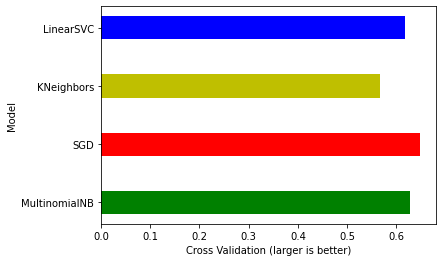

In [50]:
x = ['MultinomialNB','SGD', 'KNeighbors', 'LinearSVC']
y = [0.627, 0.648, 0.567, 0.618]
colors = ["g", "r", "y", "b", "brown"]
fig, js = plt.subplots()
plt.barh(y=range(len(x)), tick_label=x, width=y, height=0.4, color=colors);
js.set(xlabel="Cross Validation (larger is better)", ylabel="Model");

By looking at the table and the graph, we can see that SGD has the larger cross validation score of 0.648. After that MultinomialNB and LinearSVC with a similar cross validation score: 0.627 and 0.618 respectively.At last, the KNeighbors comes with an 0.567.

So, In our experiment, the best model is SGD and the worst model is KNeighbors. We can see that the difference in Cross Validation score between the best model and the worst model is significant; the best model has least of the worst model.

Finally, Min difference in Accuracy score and cross validation score is for MultinomialNB model. We campared and came to know that our best model is MNBClassifier,then the worst model is Linear SVC.

## Model Saving

In [51]:
import pickle
filename='Rating Prediction.pkl'
pickle.dump(mnb, open(filename, 'wb'))

## Conclusion

In [52]:
loaded_model = pickle.load(open('Rating Prediction.pkl', 'rb'))
result = loaded_model.score(x_test,y_test)
print(result*100)

66.46716541978387


In [53]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,5965,5966,5967,5968,5969,5970,5971,5972,5973,5974,5975,5976,5977,5978,5979,5980,5981,5982,5983,5984,5985,5986,5987,5988,5989,5990,5991,5992,5993,5994,5995,5996,5997,5998,5999,6000,6001,6002,6003,6004,6005,6006,6007,6008,6009,6010,6011,6012,6013,6014
Predicted,5,5,5,3,5,5,5,5,5,5,4,5,1,5,5,5,1,5,5,5,5,5,5,5,5,1,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,4,5,5,5,5,1,5,1,5,5,4,5,5,5,5,5,5,5,1,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,1,5,5,5,5,5
Original,5,5,5,3,5,5,5,5,5,5,4,5,1,5,5,5,1,5,5,5,5,5,5,5,5,1,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,4,5,5,5,5,1,5,1,5,5,4,5,5,5,5,5,5,5,1,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,1,5,5,5,5,5
